# Project description

**Author:** Cristian Jeraldo, www.asgeominspa.com

**Date:** June 13, 2024

**Description:** This notebook contains the necessary steps to develop an analytical accuracy analysis, including the visualization of results and the application of statistical measurement techniques.

---

# Importing libreries

In [1]:
# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data manipulation
import numpy as np
import pandas as pd

C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\__init__.py:169: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Importing data

In [2]:
# Importing data
df = pd.read_csv('MSD-ALTO_AAA_Cu_Fe_Au_Co_S.csv')

In [3]:
df.head(3)

,SAMPLE_ID,Inserto,Cu,Fe,Au,Co,S,Origen
0,STD HIGH 1,1,1.662,50.31,0.295,370,1.78,P2022-111 Análisis Estandares MSDv3.xlsx
1,STD HIGH 2,2,1.682,49.97,0.271,360,1.78,P2022-111 Análisis Estandares MSDv3.xlsx
2,STD HIGH 3,3,1.665,48.97,0.346,370,1.79,P2022-111 Análisis Estandares MSDv3.xlsx


In [4]:
df.shape

(30, 8)

# Accuracy plot

In [5]:
# Axis setting
x = df['Inserto']
y = df['Au']

In [14]:
# Edit analyte, laboratory and Certified Reference Material (CRM) 
analyte = 'Au'
lab = 'Bureau Veritas Antofagasta, Chile'
crm = 'MSD-ALTO_AAA'

In [7]:
# CRM average and standard deviation 
av = 0.299
desvest = 0.02213

In [8]:
# Specification limits
minus2SD = av - 2 * desvest
minus3SD = av - 3 * desvest
plus2SD = av + 2 * desvest
plus3SD = av + 3 * desvest

In [9]:
# Checking
minus3SD

0.23260999999999998

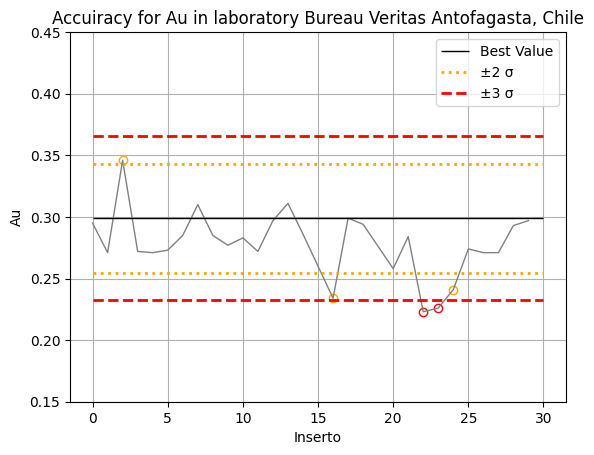

In [10]:
# Shewhart plot
fig,ax = plt.subplots()

ax.set_title("Accuiracy for {} in laboratory {}".format(analyte,lab))

# Samples result lineplot 
ax.plot(y, color='grey', linewidth=1)

# lineplot edgecolors for warnings and errors
for i in range(1,len(y)):
    if y[i] < minus3SD or y[i] > plus3SD:
        ax.scatter(x[i-1],y[i], edgecolors='red', color='white')
    elif y[i] < minus2SD or y[i] > plus2SD:
        ax.scatter(x[i-1],y[i], edgecolors='orange', color='white')    
    else:
        ax.scatter(x[i-1],y[i], color='white')       
    
# Control lines    
ax.hlines(y=av, xmin=0, xmax=len(df), linewidth=1, color='black', linestyles='-', label='Best Value')
ax.hlines(y=minus2SD, xmin=0, xmax=len(df), linewidth=2, color='orange', linestyles=':', label='±2 σ')
ax.hlines(y=plus2SD, xmin=0, xmax=len(df), linewidth=2, color='orange', linestyles=':')
ax.hlines(y=minus3SD, xmin=0, xmax=len(df), linewidth=2, color='red', linestyles='--', label='±3 σ')
ax.hlines(y=plus3SD, xmin=0, xmax=len(df), linewidth=2, color='red', linestyles='--')
plt.legend()

# Edit Y axis range (grade) and tick marks
plt.ylim([0.15,0.45])
plt.yticks(np.arange(0.15,0.45,0.05))

# Grid plot
plt.grid()

# Axis titles
plt.xlabel('Inserto')
plt.ylabel(analyte);

**Comments:**
- Add            

# Bias

In [11]:
# Average result for CRM analysis 
means = df['Au'].mean()
means.round(3)

0.278

In [12]:
# Bias
bias = (means - av) / av * 100

In [13]:
print("{} bias for {} in laboratory {} is {:.2f}".format(analyte,crm,lab,bias))

Au bias for MSD-ALTO_AAA in laboratory Bureau Veritas Antofagasta, Chile is -7.08


**Conclusion:**
- Add.